# CAU Computer Vision - Project 1

### import library

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def cv2_imshow(name: str, src):
    cv2.namedWindow(name, cv2.WINDOW_NORMAL)
    cv2.resizeWindow(name, 800, 800)
    cv2.moveWindow(name, 500, 100)

    cv2.imshow(name, src)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

## Click and get patch for 1st.jpg
### Get coordinate

In [ ]:
coord1 = []

def getCoord_1(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        coord1.append((y,x))
        print(x, y)

In [ ]:
image1_original = cv2.imread("1st.jpg")

cv2.namedWindow("1st", cv2.WINDOW_NORMAL)
cv2.resizeWindow("1st", 800, 800)
cv2.moveWindow("1st", 500, 100)
cv2.setMouseCallback("1st", getCoord_1)

cv2.imshow("1st", image1_original)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Make blurred, grayscaled images

In [ ]:
image1_blur = cv2.GaussianBlur(image1_original, (0, 0), 1)
image1_gray = cv2.cvtColor(image1_original, cv2.COLOR_BGR2GRAY)
image1_gb = cv2.GaussianBlur(image1_gray, (0,0), 1)

# cv2_imshow("image1_original", image1_original)
# cv2_imshow("image1_blur", image1_blur)
# cv2_imshow("image1_gray", image1_gray)
# cv2_imshow("image1_gb", image1_gb)

### Make patch for each clicked points

In [ ]:
patch_size = 4
patch1_original = [image1_original[coord1[i][0]-patch_size:coord1[i][0]+patch_size+1, coord1[i][1]-patch_size:coord1[i][1]+patch_size+1] for i in range(len(coord1))]
patch1_blur = [image1_blur[coord1[i][0]-patch_size:coord1[i][0]+patch_size+1, coord1[i][1]-patch_size:coord1[i][1]+patch_size+1] for i in range(len(coord1))]
patch1_gray = [image1_gray[coord1[i][0]-patch_size:coord1[i][0]+patch_size+1, coord1[i][1]-patch_size:coord1[i][1]+patch_size+1] for i in range(len(coord1))]
patch1_gb = [image1_gb[coord1[i][0]-patch_size:coord1[i][0]+patch_size+1, coord1[i][1]-patch_size:coord1[i][1]+patch_size+1] for i in range(len(coord1))]

### Show patches of 1st.jpg

In [ ]:
# for i in range(len(patch1_original)):
#     wname = "1st_" + str(i)
#     cv2_imshow(wname, patch1_original[i])

# for i in range(len(patch1_blur)):
#     wname = "1st_" + str(i)
#     cv2_imshow(wname, patch1_blur[i])

# for i in range(len(patch1_gray)):
#     wname = "1st_" + str(i)
#     cv2_imshow(wname, patch1_gray[i])

# for i in range(len(patch1_gb)):
#     wname = "1st_" + str(i)
#     cv2_imshow(wname, patch1_gb[i])

## Click and get patch for 2st.jpg
### Get coordinate

In [ ]:
coord2 = []

def getCoord_2(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        coord2.append((y,x))
        print(x, y)

In [ ]:
image2_original = cv2.imread("2nd.jpg")

cv2.namedWindow("2nd", cv2.WINDOW_NORMAL)
cv2.resizeWindow("2nd", 800, 800)
cv2.moveWindow("2nd", 500, 100)
cv2.setMouseCallback("2nd", getCoord_2)

cv2.imshow("2nd", image2_original)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Make blurred, grayscaled images

In [ ]:
image2_blur = cv2.GaussianBlur(image2_original, (0, 0), 1)
image2_gray = cv2.cvtColor(image2_original, cv2.COLOR_BGR2GRAY)
image2_gb = cv2.GaussianBlur(image2_gray, (0,0), 1)

# cv2_imshow("image2_original", image2_original)
# cv2_imshow("image2_blur", image2_blur)
# cv2_imshow("image2_gray", image2_gray)
# cv2_imshow("image2_gb", image2_gb)

### Make patch for each clicked points

In [ ]:
patch_size = 4
patch2_original = [image2_original[coord1[i][0]-patch_size:coord1[i][0]+patch_size+1, coord1[i][1]-patch_size:coord1[i][1]+patch_size+1] for i in range(len(coord1))]
patch2_blur = [image2_blur[coord1[i][0]-patch_size:coord1[i][0]+patch_size+1, coord1[i][1]-patch_size:coord1[i][1]+patch_size+1] for i in range(len(coord1))]
patch2_gray = [image2_gray[coord1[i][0]-patch_size:coord1[i][0]+patch_size+1, coord1[i][1]-patch_size:coord1[i][1]+patch_size+1] for i in range(len(coord1))]
patch2_gb = [image2_gb[coord1[i][0]-patch_size:coord1[i][0]+patch_size+1, coord1[i][1]-patch_size:coord1[i][1]+patch_size+1] for i in range(len(coord1))]

### Show patches of 2nd.jpg

In [ ]:
# for i in range(len(patch2_original)):
#     wname = "2nd_" + str(i)
#     cv2_imshow(wname, patch2_original[i])

# for i in range(len(patch2_blur)):
#     wname = "2nd_" + str(i)
#     cv2_imshow(wname, patch2_blur[i])

# for i in range(len(patch2_gray)):
#     wname = "2nd_" + str(i)
#     cv2_imshow(wname, patch2_gray[i])

# for i in range(len(patch2_gb)):
#     wname = "2nd_" + str(i)
#     cv2_imshow(wname, patch2_gb[i])

## Histograms

In [ ]:
hist_bin_gradient = 24
hist_bin_color = 25

### 1) Color images
#### (1) None_blur
##### a. Gradient Histogram

In [ ]:
def norm_gradient(src):
    
    x_forward = np.concatenate([src[:, 1:], src[:, -1:]], axis = 1)
    x_backward = np.concatenate([src[:, :1], src[:, :-1]], axis = 1)
    Dx = np.subtract(x_forward, x_backward)/2

    y_forward = np.concatenate([src[1:, :], src[-1:, :]])
    y_backward = np.concatenate([src[:1, :], src[:-1, :]])
    Dy = np.subtract(y_forward, y_backward)/2

    norm_gradient = np.sqrt(np.add(np.square(Dx), np.square(Dy)))
    norm_gradient = np.uint8(np.around(norm_gradient))
    
    return norm_gradient

In [ ]:
def gradient_histogram_color(src_list):
    hist_list = []

    for i in range(len(src_list)):
        print(f"- {i+1}th -")
        temp = []

        channels = cv2.split(src_list[i])
        colors = ['b', 'g', 'r']

        for ch, color in zip(channels, colors):
            src = norm_gradient(ch)
            hist = cv2.calcHist([src], [0], None, [int(360/hist_bin_gradient)], [0,360])
            temp.append(hist)
            plt.plot(hist, color=color)
        plt.show()
        hist_list.append(temp)

In [ ]:
print("!!!!!  Color - NoneBlur - Gradient Histogram  !!!!!")

print("*** 1st.jpg ****")
hist_list_1st = gradient_histogram_color(patch1_original)

print("*** 2nd.jpg ****")
hist_list_1st = gradient_histogram_color(patch2_original)

##### b. Color Histogram

In [ ]:
def color_histogram_color(src_list):
    hist_list = []

    for i in range(len(src_list)):
        print(f"- {i+1}th -")
        temp = []

        channels = cv2.split(src_list[i])
        colors = ['b', 'g', 'r']

        for ch, color in zip(channels, colors):
            hist = cv2.calcHist([ch], [0], None, [int(256/hist_bin_color)], [0,256])
            temp.append(hist)
            plt.plot(hist, color=color)
        plt.show()
        hist_list.append(temp)

In [ ]:
print("!!!!!  Color - NoneBlur - Color Histogram  !!!!!")

print("*** 1st.jpg ****")
hist_list_1st = color_histogram_color(patch1_original)

print("*** 2nd.jpg ****")
hist_list_1st = color_histogram_color(patch2_original)

#### (2) Blur
##### a. Gradient Histogram

In [ ]:
print("!!!!!  Color - Blur - Gradient Histogram  !!!!!")

print("*** 1st.jpg ****")
hist_list_1st = gradient_histogram_color(patch1_blur)

print("*** 2nd.jpg ****")
hist_list_1st = gradient_histogram_color(patch2_blur)

##### b. Color Histogram

### (1) Gradient Histogram

!!!!!  Color - Blur - Color Histogram  !!!!!
*** 1st.jpg ****
- 1th -


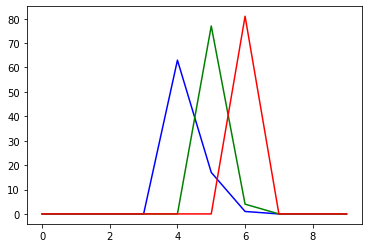

- 2th -


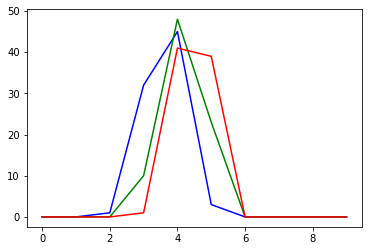

- 3th -


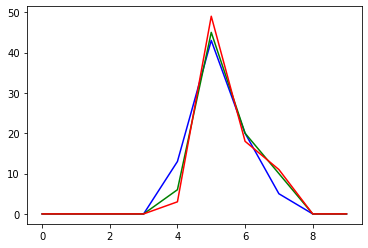

- 4th -


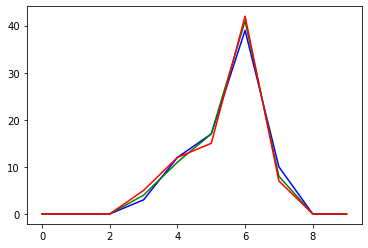

*** 2nd.jpg ****
- 1th -


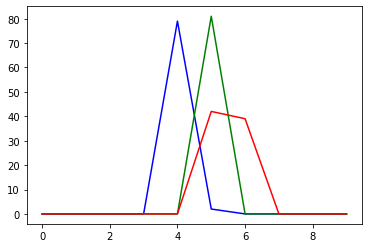

- 2th -


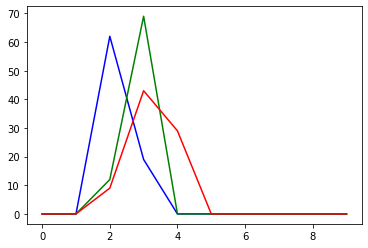

- 3th -


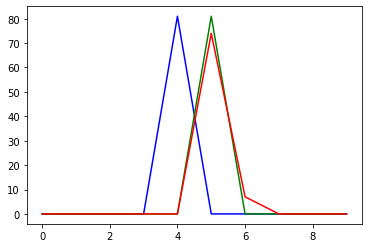

- 4th -


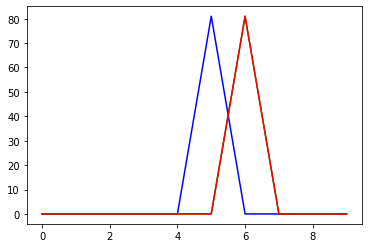

In [52]:
print("!!!!!  Color - Blur - Color Histogram  !!!!!")

print("*** 1st.jpg ****")
hist_list_1st = color_histogram_color(patch1_blur)

print("*** 2nd.jpg ****")
hist_list_1st = color_histogram_color(patch2_blur)

In [ ]:
def norm_gradient(src):
    
    x_forward = np.concatenate([src[:, 1:], src[:, -1:]], axis = 1)
    x_backward = np.concatenate([src[:, :1], src[:, :-1]], axis = 1)
    Dx = np.subtract(x_forward, x_backward)/2

    y_forward = np.concatenate([src[1:, :], src[-1:, :]])
    y_backward = np.concatenate([src[:1, :], src[:-1, :]])
    Dy = np.subtract(y_forward, y_backward)/2

    norm_gradient = np.sqrt(np.add(np.square(Dx), np.square(Dy)))
    norm_gradient = np.uint8(np.around(norm_gradient))
    
    return norm_gradient

In [ ]:
def gradient_histogram(src_list):
    hist_list = []

    for i in range(len(src_list)):
        print(f"- {i+1}th -")
        src = cv2.cvtColor(src_list[i], cv2.COLOR_BGR2GRAY)
        grd = norm_gradient(src)
        hist = cv2.calcHist([grd], [0], None, [int(256/hist_bin)], [0, 360])
        hist_list.append(hist)
        plt.plot(hist)
        plt.show()

In [ ]:
print("*** 1st.jpg ****")
hist_list_1st = gradient_histogram(patch1)

print("*** 2nd.jpg ****")
hist_list_1st = gradient_histogram(patch2)

### (2) Brightness Histogram

## Click and get patch for 1st.jpg
### Get coordinate

In [ ]:
src = cv2.cvtColor(patch1[0], cv2.COLOR_BGR2GRAY)
hist = cv2.calcHist([src], [0], None, [int(256/hist_bin)], [0, 256])
plt.plot(hist)
plt.show()


### (3) Color Histogram

In [ ]:
print("hello")